# Projekt „Startup Growth & Funding Trends“  

## Gruppenmitglieder  
- Tom Scheider 
- Mark Nolepa
- Lukas Trölsch
- Silas Engel

## Kurz-Review des Datensatzes  
- Der Datensatz stammt von Kaggle und trägt den Titel **„Startup Growth & Funding Trends“**. 
- Er enthält Daten zu Start-ups, deren Wachstum und Finanzierungsrunden („funding rounds“) über verschiedene Jahre und Regionen hinweg.  
- Typische Merkmale sind: Start-up-Name, Branche, Finanzierungsbetrag, Datum der Runde, Investor(en) 
- Ziel: Trends im Startup-Ökosystem identifizieren – z. B. wie häufig Finanzierungsrunden stattfinden, wie groß die Beträge sind, welche Branchen und Regionen dominieren.

## Hyperlink zum Datensatz  
[Startup Growth & Funding Trends – Kaggle](https://www.kaggle.com/datasets/samayashar/startup-growth-and-funding-trends/data)

## Unser Geschäftsziel  
- Wir möchten anhand des Datensatzes, **große Mengen an StartUps  ressourcen effizient für Investoren bewerten, um mögliche UNICORNS zu identifizieren**. 
- Zudem wollen wir ein **Empfehlungsmodell** entwickeln, das Investoren unterstützt bei der Frage: *„In welche Start-ups mit hohem Wachstumspotenzial sollte ich investieren?“*  
- Langfristig zielt unser Projekt darauf ab, **Entscheidungshilfen für Gründer und Investoren** bereitzustellen und **Marktchancen frühzeitig zu erkennen**.



## Installation und Importe
- Im folgenden werden alle **Module installiert**, welche Sie noch nicht bereits Installiert haben. 
- Anschließend werden alle erforderlichen **Programme importiert und eingelesen**, damit wir anschließend mit ihnen arbeiten können. 

In [6]:
import subprocess
import sys

# Methode, die überprüft, ob ein Modul installiert ist, und es bei Bedarf installiert.
# Methode wurde inspiriert durch: https://medium.com/@ryan_forrester_/fixing-no-module-named-error-in-python-3d5f79cbb44c
def installiere_Wenn_Modul_Fehl(Modul: str):
    try:
        # versucht, das Modul zu importieren
        __import__(Modul)
    except ImportError:
        # falls das Modul nicht gefunden wird (ImportError), wird es installiert
        subprocess.check_call([sys.executable, "-m", "pip", "install", Modul])

# Installation der benötigten Module (falls sie fehlen)
installiere_Wenn_Modul_Fehl("kagglehub")
installiere_Wenn_Modul_Fehl("pandas")
installiere_Wenn_Modul_Fehl("seaborn")
installiere_Wenn_Modul_Fehl("matplotlib")

print("Alle benötigten Module sind installiert.")

Alle benötigten Module sind installiert.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

print("Der Import ist gelungen!")

Der Import ist gelungen!


In [3]:
df = pd.read_csv('startup_data.csv')  

print("Die benötigen Daten wurden geladen!")  

Die benötigen Daten wurden geladen!


## Informationen zum Datensatz

- Im folgenden wird zum Verständnis für das spätere Bearbeiten, die Datentypen deklariert und wichtige Kennzhalen angegeben.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup Name            500 non-null    object 
 1   Industry                500 non-null    object 
 2   Funding Rounds          500 non-null    int64  
 3   Funding Amount (M USD)  500 non-null    float64
 4   Valuation (M USD)       500 non-null    float64
 5   Revenue (M USD)         500 non-null    float64
 6   Employees               500 non-null    int64  
 7   Market Share (%)        500 non-null    float64
 8   Profitable              500 non-null    int64  
 9   Year Founded            500 non-null    int64  
 10  Region                  500 non-null    object 
 11  Exit Status             500 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 47.0+ KB


In [32]:
df.describe()

,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.958000,152.656760,1371.809180,49.321740,2532.092000,5.092940,0.432000,2006.044000
std,1.440968,86.683711,978.226579,29.267605,1385.434921,2.807646,0.495851,9.347128
min,1.000000,0.570000,2.430000,0.120000,12.000000,0.100000,0.000000,1990.000000
25%,2.000000,79.212500,557.027500,22.802500,1382.750000,2.760000,0.000000,1998.000000
50%,3.000000,156.005000,1222.580000,48.800000,2496.500000,5.135000,0.000000,2006.000000
75%,4.000000,226.450000,2052.085000,74.965000,3708.750000,7.552500,1.000000,2014.000000
max,5.000000,299.810000,4357.490000,99.710000,4984.000000,10.000000,1.000000,2022.000000


# StartUp growth & funding values

# Teil 1: Business Understanding & Datenexploration

## 1.1 Business Kontext

### Business Problem
**Erkennen potenzieller Unicorns**:
- Unser Ziel ist es, mithilfe der verfügbaren CSV-Daten Unternehmen zu identifizieren, die ein besonders hohes Wachstumspotenzial aufweisen und sich somit zu sogenannten Unicorns (Start-ups mit einer Bewertung über einer Milliarde US-Dollar) entwickeln könnten.

**Risiko-Segmentierung**:
- Darüber hinaus möchten wir durch datenbasierte Analysen eine Risiko-Segmentierung vornehmen, um Start-ups anhand relevanter Faktoren in verschiedene Risikokategorien einzuteilen und so fundierte Investitionsentscheidungen zu unterstützen.

### Geschäftsfragen

- **Welche Kennzahlen beeinflussen die Profitabilität als Investor?**
- **Wie gut kann ein datenbasiertes Modell vorhersagen auf profitable StartUps treffen?**


## Warum Data-Science?

### 🎯 Zielsetzung unserer Analyse

- Unsere Analyse verfolgt das Ziel, datenbasierte Entscheidungen im Bereich **Start-up-Investitionen** zu unterstützen und psychologische Verzerrungen bei der Bewertung von Unternehmen zu reduzieren.  

### 🧩 Überblick über große Start-up-Mengen
Angesichts der Vielzahl an bestehenden und neu gegründeten Start-ups ist es für Investoren schwierig, den Überblick zu behalten. Durch den Einsatz datenanalytischer Methoden soll eine strukturierte und effiziente Übersicht über große Start-up-Mengen geschaffen werden.

### 🔍 Herausfiltern besonders relevanter Start-ups
Ein zentrales Anliegen ist es, aus dieser großen Menge **besonders relevante und vielversprechende Start-ups** zu identifizieren – also jene Unternehmen, die überdurchschnittliches Wachstumspotenzial oder einzigartige Marktchancen bieten.

### 🧠 Reduktion von subjektiven Verzerrungen
Traditionelle Investitionsentscheidungen sind oft von **Bauchgefühl** und **kognitiven Verzerrungen (Biases)** beeinflusst. Zu den häufigsten zählen:
- **Confirmation Bias:** Die Tendenz, Informationen so zu interpretieren, dass sie bestehende Überzeugungen bestätigen.  
- **Halo-Effekt:** Die Neigung, ein Unternehmen aufgrund einzelner positiver Merkmale insgesamt zu überschätzen.  
- **Recency Bias:** Jüngste Ereignisse werden überbewertet, während ältere, aber relevante Informationen vernachlässigt werden.  

### 📊 Datenbasierte Investitionsentscheidungen
Durch die Analyse von Start-up-Daten (z. B. Finanzierungsrunden, Branchenzugehörigkeit, Wachstumstrends) soll eine **objektive und nachvollziehbare Entscheidungsgrundlage** geschaffen werden.  
Dies ermöglicht Investoren, Chancen und Risiken faktenbasiert zu bewerten und die Wahrscheinlichkeit erfolgreicher Investments zu erhöhen.


## 1.2 Explorative Datenanalyse

### Daten-Visualisierung


### Graph V1

### 📊 Vergleich der Umsätze profitabler und unprofitabler Start-ups

Der folgende Boxplot visualisiert die Verteilung des **Umsatzes (Revenue in Mio. USD)** zwischen profitablen und unprofitablen Start-ups.  
Durch diese Darstellung können wir auf einen Blick erkennen, wie stark sich die Umsatzstrukturen zwischen beiden Gruppen unterscheiden.

### 🔍 Zweck der Visualisierung
- Der **Boxplot** zeigt Median, Quartile und mögliche Ausreißer der Umsatzverteilung für jede Kategorie („Profitabel“ vs. „Unprofitabel“).  
- Zusätzlich sind die **durchschnittlichen Umsatzwerte** oberhalb der Boxen markiert, um einen schnellen quantitativen Vergleich zu ermöglichen.  
- Diese Visualisierung hilft uns zu verstehen, **ob ein klarer Zusammenhang zwischen Profitabilität und Umsatzhöhe besteht**, und liefert somit wertvolle Hinweise auf die Wachstums- und Erfolgsfaktoren von Start-ups.

### 💡 Warum dieser Graph wichtig ist
Ein datenbasierter Vergleich der finanziellen Kennzahlen reduziert subjektive Einschätzungen und ermöglicht eine **objektivere Bewertung von Geschäftsmodellen**.  
So können potenziell erfolgreiche Start-ups frühzeitig identifiziert und Investitionsentscheidungen besser begründet werden.


/var/folders/h6/xnldbwzs6z5g_n88vb8sq7j40000gn/T/ipykernel_40768/4186240759.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Profitable", y=metric, data=df, palette="coolwarm", order=order)
/var/folders/h6/xnldbwzs6z5g_n88vb8sq7j40000gn/T/ipykernel_40768/4186240759.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


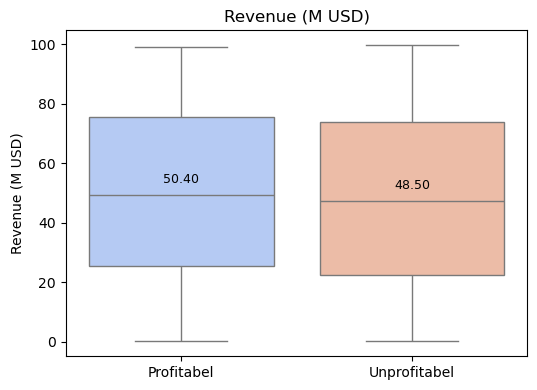

In [4]:
metrics = ["Revenue (M USD)"]
order = [1, 0]
labels = ["Profitabel", "Unprofitabel"]

plt.figure(figsize=(15, 4))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    ax = sns.boxplot(x="Profitable", y=metric, data=df, palette="coolwarm", order=order)
    ax.set_xticklabels(labels)
    ax.set_xlabel("")
    plt.title(f"{metric}")

    for j, prof_value in enumerate(order):
        mean_val = df[df["Profitable"] == prof_value][metric].mean()
        ax.text(j, mean_val + (df[metric].max() * 0.03), f"{mean_val:.2f}", 
                ha='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

### Graph V2

### Verteilung Anzahl der StartUps nach Industrie 


/var/folders/h6/xnldbwzs6z5g_n88vb8sq7j40000gn/T/ipykernel_27290/3445576098.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")


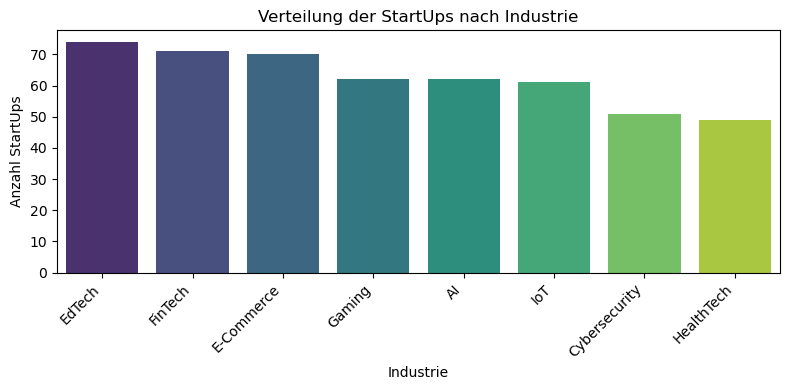

Antwort: Die meisten StartUps stammen aus der Industrie 'EdTech' mit 74 Unternehmen.


In [34]:
# Verteilung Anzahl der StartUps nach Industrie (Säulendiagramm) + kurze Antwort
industry_counts = df['Industry'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")
plt.ylabel("Anzahl StartUps")
plt.xlabel("Industrie")
plt.title("Verteilung der StartUps nach Industrie")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

top_industry = industry_counts.index[0]
top_count = industry_counts.iloc[0]
print(f"Antwort: Die meisten StartUps stammen aus der Industrie '{top_industry}' mit {top_count} Unternehmen.")

### Graph V3

### Verteilung der StartUps nach Region

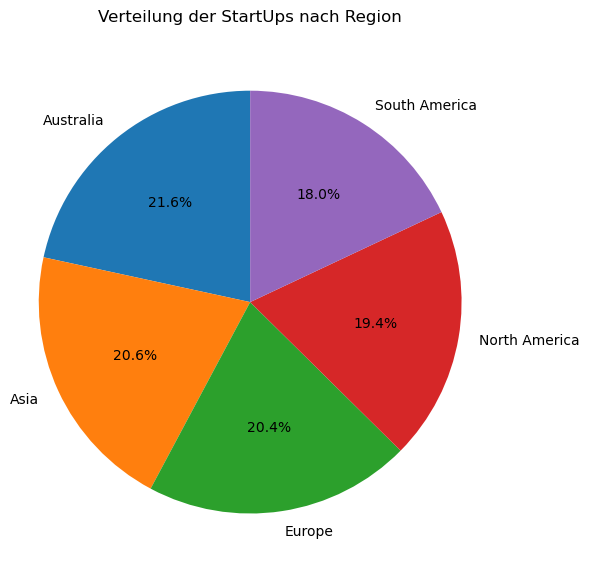

Antwort: Die meisten StartUps stammen aus der Region 'Australia' mit 108 Unternehmen (21.6%).


In [7]:
 #..existing code...
region_counts = df['Region'].value_counts().sort_values(ascending=False)

# ALT (Balkendiagramm)
# plt.figure(figsize=(8,4))
# sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
# plt.ylabel("Anzahl StartUps")
# plt.xlabel("Region")
# plt.title("Verteilung der StartUps nach Region")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()

# NEU (Kreisdiagramm)
plt.figure(figsize=(6,6))
plt.pie(
    region_counts.values,
    labels=region_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Verteilung der StartUps nach Region")
plt.axis("equal")
plt.tight_layout()
plt.show()

top_region = region_counts.index[0]
top_count = region_counts.iloc[0]
share = top_count / region_counts.sum() * 100
print(f"Antwort: Die meisten StartUps stammen aus der Region '{top_region}' mit {top_count} Unternehmen ({share:.1f}%).")
# ...existing code...#ä##

### Graph V4

### Marktanteilanalyse

Die Marktanteilanalyse spalten wir in zwei Teile. Der erste wird analysieren wie hoch der Marktanteil der Unternehmen im Vergleich zu den restlichen 499 ist und im zweiten Teil geht es um die Analyse von den Unternehmen im Verhältnis zu den Konkurrenten im selben Marktbereich.


In [22]:
# Verwende die vorhandenen Startup-Daten (eff_df) und gültige Spaltennamen
top30 = eff_df.nlargest(30, "Valuation (M USD)")
top30 = top30[top30["Revenue (M USD)"] > 0]

fig = px.scatter(
    top30,
    x="Revenue (M USD)",
    y="Valuation (M USD)",
    size="Valuation (M USD)",
    color="Industry",
    hover_name="Startup Name",
    log_x=True,
    size_max=60,
    title="Top 30 Startups nach Bewertung (Bubble Chart)"
)
fig.show()

In [24]:
# ...existing code...
# Marktanteil innerhalb des Wirtschaftszweigs (Revenue-basiert) berechnen
eff_df["Industry Total Revenue"] = eff_df.groupby("Industry")["Revenue (M USD)"].transform("sum")
eff_df["Industry Market Share (%)"] = (eff_df["Revenue (M USD)"] / eff_df["Industry Total Revenue"]) * 100

# Top 30 nach Bewertung, nur mit Umsatz > 0
top30 = eff_df.nlargest(30, "Valuation (M USD)")
top30 = top30[top30["Revenue (M USD)"] > 0]

# Größen-Skalierung für Bubble-Chart
sizes = top30["Industry Market Share (%)"]
sizeref = 2.0 * sizes.max() / (60.0 ** 2)  # size_max=60

fig = px.scatter(
    top30,
    x="Revenue (M USD)",
    y="Valuation (M USD)",
    size="Industry Market Share (%)",  # Bubble-Größe = Marktanteil
    color="Industry",
    hover_name="Startup Name",
    hover_data={"Industry Market Share (%)": True, "Revenue (M USD)": True, "Valuation (M USD)": True},
    log_x=True,
    size_max=60,
    title="Top 30 Startups nach Bewertung (Bubble Chart, Größe = Marktanteil im Wirtschaftszweig)"
)
fig.update_traces(marker=dict(sizeref=sizeref, sizemin=4))
fig.show()
# ...existing code...

In [25]:
# ...existing code...
# Marktanteil innerhalb des Wirtschaftszweigs (Revenue-basiert) berechnen
eff_df["Industry Total Revenue"] = eff_df.groupby("Industry")["Revenue (M USD)"].transform("sum")
eff_df["Industry Market Share (%)"] = (eff_df["Revenue (M USD)"] / eff_df["Industry Total Revenue"]) * 100

# Top 30 nach Bewertung, nur mit Umsatz > 0
top100 = eff_df.nlargest(100, "Valuation (M USD)")
top100 = top100[top100["Revenue (M USD)"] > 0]

# Größen-Skalierung für Bubble-Chart
sizes = top30["Industry Market Share (%)"]
sizeref = 2.0 * sizes.max() / (60.0 ** 2)  # size_max=60

fig = px.scatter(
    top100,
    x="Revenue (M USD)",
    y="Valuation (M USD)",
    size="Industry Market Share (%)",  # Bubble-Größe = Marktanteil
    color="Industry",
    hover_name="Startup Name",
    hover_data={"Industry Market Share (%)": True, "Revenue (M USD)": True, "Valuation (M USD)": True},
    log_x=True,
    size_max=60,
    title="Top 100 Startups nach Bewertung (Bubble Chart, Größe = Marktanteil im Wirtschaftszweig)"
)
fig.update_traces(marker=dict(sizeref=sizeref, sizemin=4))
fig.show()
# ...existing code...

### Graph V5

### Wo entsteht am meisten Umsatz pro investieretem USD?


Umsatz-Effizienz (Revenue / Funding) nach Branche (höher = mehr Umsatz pro investiertem USD):
               Mean_Ratio  Median_Ratio  Count
Industry                                      
HealthTech          3.811         0.378     49
Gaming              2.248         0.304     62
FinTech             1.099         0.294     71
IoT                 0.932         0.290     61
EdTech              0.894         0.325     74
AI                  0.756         0.334     62
E-Commerce          0.620         0.339     70
Cybersecurity       0.562         0.347     51

Umsatz-Effizienz nach Region:
               Mean_Ratio  Median_Ratio  Count
Region                                        
Europe              2.074         0.366    102
South America       1.349         0.300     90
Australia           1.047         0.336    108
North America       1.010         0.296     97
Asia                0.991         0.296    103

Top 10 Startups nach Umsatz-Effizienz:
    Startup Name    Industry        

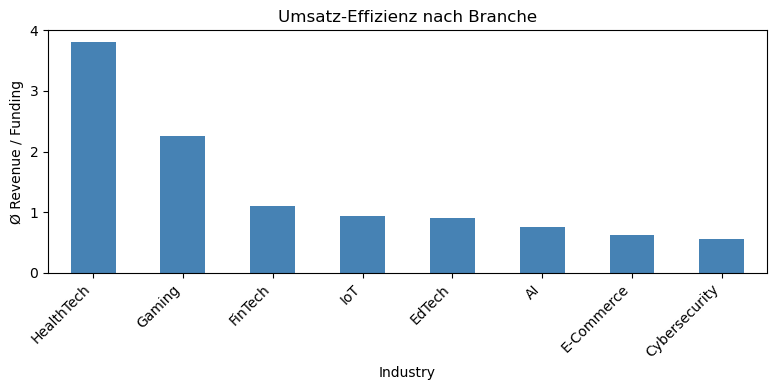

In [8]:
# Frage 1: Wo entsteht am meisten Umsatz pro investiertem USD?
# Kennzahl: Umsatz-Effizienz = Revenue (M USD) / Funding Amount (M USD)

eff_df = df.assign(
    Revenue_per_Invested_USD=df['Revenue (M USD)'] / df['Funding Amount (M USD)']
)

# Aggregation nach Branche und Region
eff_industry = (
    eff_df.groupby('Industry')
    .agg(Mean_Ratio=('Revenue_per_Invested_USD', 'mean'),
         Median_Ratio=('Revenue_per_Invested_USD', 'median'),
         Count=('Revenue_per_Invested_USD', 'size'))
    .sort_values('Mean_Ratio', ascending=False)
    .round(3)
)

eff_region = (
    eff_df.groupby('Region')
    .agg(Mean_Ratio=('Revenue_per_Invested_USD', 'mean'),
         Median_Ratio=('Revenue_per_Invested_USD', 'median'),
         Count=('Revenue_per_Invested_USD', 'size'))
    .sort_values('Mean_Ratio', ascending=False)
    .round(3)
)

# Top 10 einzelne Startups nach Effizienz
top_startups = (
    eff_df[['Startup Name','Industry','Region','Funding Amount (M USD)','Revenue (M USD)','Revenue_per_Invested_USD']]
    .sort_values('Revenue_per_Invested_USD', ascending=False)
    .head(10)
    .round(3)
)

print("Umsatz-Effizienz (Revenue / Funding) nach Branche (höher = mehr Umsatz pro investiertem USD):")
print(eff_industry)
print("\nUmsatz-Effizienz nach Region:")
print(eff_region)
print("\nTop 10 Startups nach Umsatz-Effizienz:")
print(top_startups)

best_industry = eff_industry.index[0]
best_industry_value = eff_industry.iloc[0]['Mean_Ratio']
best_region = eff_region.index[0]
best_region_value = eff_region.iloc[0]['Mean_Ratio']

print(f"\nAntwort: Die höchste durchschnittliche Umsatz-Effizienz liegt in der Branche '{best_industry}' (Ø {best_industry_value:.3f} Umsatz pro investiertem USD).")
print(f"Regional erzielt '{best_region}' die beste Effizienz (Ø {best_region_value:.3f}).")

# Optional: einfache Visualisierung nach Branche
plt.figure(figsize=(8,4))
eff_industry['Mean_Ratio'].plot(kind='bar', color='steelblue')
plt.ylabel('Ø Revenue / Funding')
plt.title('Umsatz-Effizienz nach Branche')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Graph V6

### Wie effienzient wird Personal skaliert?

➤ Umsatz-Effizienz (Revenue pro Mitarbeiter) nach Branche:
               Mean_Rev_per_Emp  Median_Rev_per_Emp  Count
Industry                                                  
Cybersecurity             0.105               0.021     51
HealthTech                0.060               0.019     49
E-Commerce                0.052               0.024     70
AI                        0.045               0.024     62
Gaming                    0.041               0.020     62
FinTech                   0.039               0.020     71
EdTech                    0.033               0.018     74
IoT                       0.027               0.014     61

➤ Umsatz-Effizienz nach Region:
               Mean_Rev_per_Emp  Median_Rev_per_Emp  Count
Region                                                    
Asia                      0.092               0.022    103
North America             0.043               0.021     97
Australia                 0.043               0.018    108
Europe                 

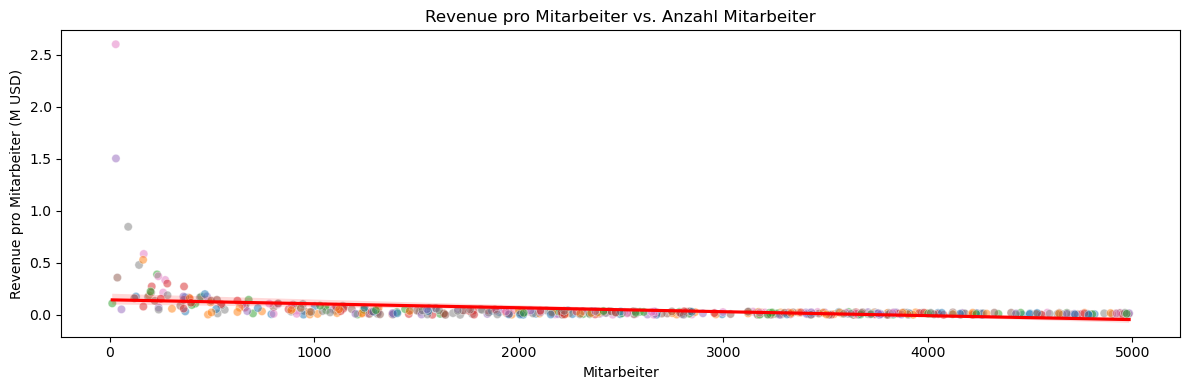

In [37]:
# Analyse 1.3: Effizienz der Personalskalierung (Revenue-Fokus)
# Kennzahl: Revenue_per_Employee = Umsatz (M USD) je Mitarbeiter

base_df = eff_df.copy() if 'eff_df' in globals() else df.copy()

work_emp = base_df.copy()
work_emp['Employees_nonzero'] = work_emp['Employees'].replace(0, np.nan)
work_emp['Revenue_per_Employee'] = work_emp['Revenue (M USD)'] / work_emp['Employees_nonzero']

# Aggregation nach Branche und Region
agg_industry = (
    work_emp.groupby('Industry')
    .agg(
        Mean_Rev_per_Emp=('Revenue_per_Employee', 'mean'),
        Median_Rev_per_Emp=('Revenue_per_Employee', 'median'),
        Count=('Revenue_per_Employee', 'size')
    )
    .sort_values('Mean_Rev_per_Emp', ascending=False)
    .round(3)
)

agg_region = (
    work_emp.groupby('Region')
    .agg(
        Mean_Rev_per_Emp=('Revenue_per_Employee', 'mean'),
        Median_Rev_per_Emp=('Revenue_per_Employee', 'median'),
        Count=('Revenue_per_Employee', 'size')
    )
    .sort_values('Mean_Rev_per_Emp', ascending=False)
    .round(3)
)

top_startups_emp = (
    work_emp[['Startup Name','Industry','Region','Employees','Revenue (M USD)','Revenue_per_Employee']]
    .sort_values('Revenue_per_Employee', ascending=False)
    .head(10)
    .round(3)
)

print("➤ Umsatz-Effizienz (Revenue pro Mitarbeiter) nach Branche:")
print(agg_industry.head(10))
print("\n➤ Umsatz-Effizienz nach Region:")
print(agg_region)
print("\n➤ Top 10 Startups nach Revenue pro Mitarbeiter:")
print(top_startups_emp)

best_ind = agg_industry.index[0]
best_ind_val = agg_industry.iloc[0]['Mean_Rev_per_Emp']
best_reg = agg_region.index[0]
best_reg_val = agg_region.iloc[0]['Mean_Rev_per_Emp']

# Korrelationen (Spearman) mit Revenue_per_Employee
corr_vars = ['Employees','Funding Amount (M USD)','Valuation (M USD)','Revenue (M USD)','Profitable']
corr_df = work_emp[corr_vars + ['Revenue_per_Employee']].corr(method='spearman')['Revenue_per_Employee'].drop('Revenue_per_Employee').round(3)

print("\nSpearman-Korrelationen mit Revenue_per_Employee (positiv = steigt mit Kennzahl):")
print(corr_df)

print("\nAntwort 1.3:")
print(
    f"Die höchste durchschnittliche Umsatz-Effizienz (Revenue pro Mitarbeiter) liegt in der Branche '{best_ind}' (Ø {best_ind_val:.3f} M USD je Mitarbeiter) "
    f"und regional in '{best_reg}' (Ø {best_reg_val:.3f}). "
    "Korrelationen zeigen, ob größere Teams oder höhere Bewertungen mit Effizienz zusammenhängen. "
    "Interpretation: "
    + ("Mehr Mitarbeiter senken Effizienz. " if corr_df['Employees'] < 0 else "Mehr Mitarbeiter erhöhen Effizienz oder neutral. ")
    + ("Höhere Bewertung korreliert positiv. " if corr_df['Valuation (M USD)'] > 0 else "Bewertung zeigt keinen klar positiven Zusammenhang. ")
    + ("Höherer Gesamtumsatz setzt sich teils in Effizienz um. " if corr_df['Revenue (M USD)'] > 0 else "Gesamtumsatz steigert nicht zwingend Effizienz. ")
)

# Optionale Visualisierung
plt.figure(figsize=(12,4))
sns.scatterplot(data=work_emp, x='Employees', y='Revenue_per_Employee', hue='Industry', legend=False, alpha=0.5)
sns.regplot(data=work_emp, x='Employees', y='Revenue_per_Employee', scatter=False, color='red')
plt.title('Revenue pro Mitarbeiter vs. Anzahl Mitarbeiter')
plt.xlabel('Mitarbeiter')
plt.ylabel('Revenue pro Mitarbeiter (M USD)')
plt.tight_layout()
plt.show()

### Graph V7

### Hebt ein höherer Marktanteil die Bewertung, Profitabilität und Kapital-Effizienz?

Spearman-Korrelationen mit Marktanteil (positiv = steigt mit Marktanteil):
Valuation (M USD)           0.106
Revenue_per_Invested_USD   -0.059
Profitable                  0.118
Name: Market Share (%), dtype: float64

Kennzahlen nach Marktanteils-Quartilen:
                      Ø_Bewertung  Ø_Kapital_Effizienz  \
Market Share Quartil                                     
Q1 (niedrig)             1218.201                1.503   
Q2                       1333.876                0.908   
Q3                       1389.514                1.394   
Q4 (hoch)                1546.571                1.360   

                      IPO_Profitabilität_Rate    n  
Market Share Quartil                                
Q1 (niedrig)                            0.381  126  
Q2                                      0.347  124  
Q3                                      0.512  125  
Q4 (hoch)                               0.488  125  


/var/folders/h6/xnldbwzs6z5g_n88vb8sq7j40000gn/T/ipykernel_27290/3039187561.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  work.groupby('Market Share Quartil')
/var/folders/h6/xnldbwzs6z5g_n88vb8sq7j40000gn/T/ipykernel_27290/3039187561.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_ms.reset_index(), x='Market Share Quartil', y='IPO_Profitabilität_Rate', palette='viridis')


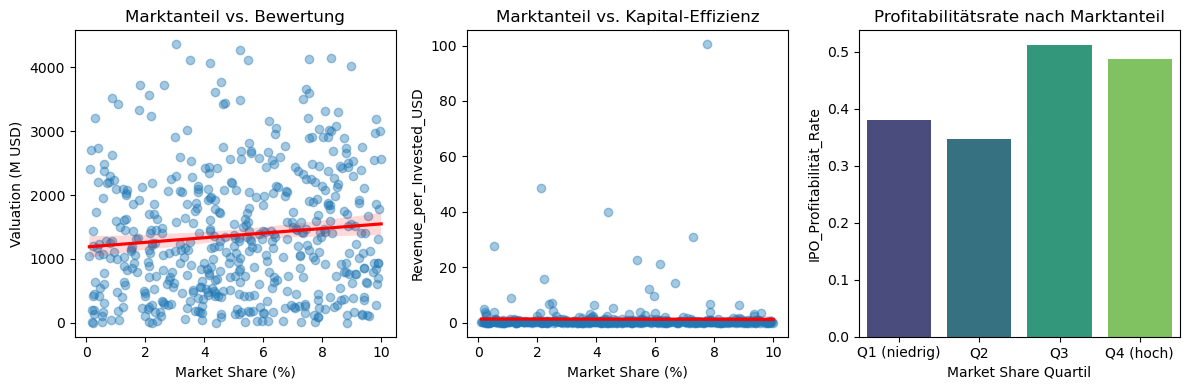


Antwort 1.4: Ein höherer Marktanteil korreliert positiv mit der Bewertung (0.106), negativ/neutral mit der Kapital-Effizienz (-0.059) und positiv mit der Profitabilität (0.118). Die Quartile stützen diesen Trend.


In [41]:
# 1.4 Hebt ein höherer Marktanteil die Bewertung, Profitabilität und Kapital-Effizienz?

# Arbeitsdaten mit Kapital-Effizienz (Revenue/Funding)
work = eff_df.copy() if 'eff_df' in globals() else df.assign(
    Revenue_per_Invested_USD=df['Revenue (M USD)'] / df['Funding Amount (M USD)']
).copy()

# Korrelationen (Spearman) zwischen Marktanteil und Zielgrößen
corr = (
    work[['Market Share (%)', 'Valuation (M USD)', 'Revenue_per_Invested_USD', 'Profitable']]
    .corr(method='spearman')
    .loc['Market Share (%)']
    .drop('Market Share (%)')
    .round(3)
)

print("Spearman-Korrelationen mit Marktanteil (positiv = steigt mit Marktanteil):")
print(corr)

# Quartile des Marktanteils und aggregierte Metriken
work['Market Share Quartil'] = pd.qcut(
    work['Market Share (%)'], 4,
    labels=['Q1 (niedrig)', 'Q2', 'Q3', 'Q4 (hoch)'],
    duplicates='drop'
)

agg_ms = (
    work.groupby('Market Share Quartil')
    .agg(
        Ø_Bewertung=('Valuation (M USD)', 'mean'),
        Ø_Kapital_Effizienz=('Revenue_per_Invested_USD', 'mean'),
        IPO_Profitabilität_Rate=('Profitable', 'mean'),
        n=('Profitable', 'size')
    )
    .round(3)
)

print("\nKennzahlen nach Marktanteils-Quartilen:")
print(agg_ms)

# Kurze Visualisierung
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.regplot(data=work, x='Market Share (%)', y='Valuation (M USD)', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Marktanteil vs. Bewertung')

plt.subplot(1,3,2)
sns.regplot(data=work, x='Market Share (%)', y='Revenue_per_Invested_USD', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Marktanteil vs. Kapital-Effizienz')

plt.subplot(1,3,3)
sns.barplot(data=agg_ms.reset_index(), x='Market Share Quartil', y='IPO_Profitabilität_Rate', palette='viridis')
plt.title('Profitabilitätsrate nach Marktanteil')
plt.tight_layout()
plt.show()

# Fazit in einem Satz
trend_bew = "positiv" if corr['Valuation (M USD)'] > 0 else "negativ/neutral"
trend_eff = "positiv" if corr['Revenue_per_Invested_USD'] > 0 else "negativ/neutral"
trend_prof = "positiv" if corr['Profitable'] > 0 else "negativ/neutral"

print(
    f"\nAntwort 1.4: Ein höherer Marktanteil korreliert {trend_bew} mit der Bewertung "
    f"({corr['Valuation (M USD)']}), {trend_eff} mit der Kapital-Effizienz "
    f"({corr['Revenue_per_Invested_USD']}) und {trend_prof} mit der Profitabilität "
    f"({corr['Profitable']}). Die Quartile stützen diesen Trend."
)

### Potentielle Verzerrungen (Biases) im Datensatz

Bei der Analyse von Start-up-Daten ist es wichtig, sich der Grenzen und möglichen Verzerrungen bewusst zu sein, die sowohl in der Datenerhebung als auch in der Zusammensetzung des Datensatzes liegen können. Im Folgenden diskutieren wir einige zentrale Aspekte, die die Aussagekraft unserer Ergebnisse beeinflussen könnten.

**Eingeschränkte Stichprobengröße:**

 Unser Datensatz umfasst eine vergleichsweise begrenzte Anzahl von Unternehmen. Bei einer kleineren Stichprobe besteht das Risiko, dass einzelne Ausreißer oder besonders erfolgreiche Start-ups die statistischen Kennzahlen unverhältnismäßig stark beeinflussen. So kann beispielsweise ein einzelnes „Unicorn" mit extrem hoher Bewertung oder Umsatz die durchschnittliche Profitabilität der gesamten Stichprobe künstlich nach oben ziehen, obwohl die Mehrheit der Unternehmen deutlich moderatere Werte aufweist. Dies führt dazu, dass Durchschnittswerte möglicherweise nicht das typische Start-up repräsentieren.

**Survivorship Bias:**

 Ein klassisches Problem in Start-up-Datensätzen ist der Survivorship Bias. Oft werden nur Unternehmen erfasst, die eine gewisse Phase überlebt haben oder bereits Finanzierungsrunden abgeschlossen haben. Gescheiterte Start-ups oder solche, die sich noch in sehr frühen Phasen befinden, sind unterrepräsentiert oder fehlen gänzlich. Dies kann zu einer systematischen Überschätzung der Erfolgswahrscheinlichkeit führen, da das Bild verzerrt wird: Wir sehen hauptsächlich die „Gewinner" oder zumindest die Unternehmen, die lange genug bestanden haben, um in die Datenbank aufgenommen zu werden.

**Regionale und branchenspezifische Verzerrungen:** 

Die Verteilung der Start-ups über Regionen und Branchen ist selten gleichmäßig. Bestimmte Regionen (z. B. etablierte Tech-Hubs) oder Branchen (z. B. FinTech, EdTech) können überrepräsentiert sein, während andere Märkte oder Sektoren unterrepräsentiert bleiben. Ergebnisse, die aus solchen Daten abgeleitet werden, sind möglicherweise nicht ohne Weiteres auf andere geografische oder sektorale Kontexte übertragbar. Parameter wie **Region** und **Industry** könnten somit systematisch verzerrt sein, wenn die Stichprobe nicht die globale oder sektorübergreifende Vielfalt zeigt.

**Zeitliche Verzerrungen durch unterschiedliche Gründungsjahre:** 

Start-ups in unserem Datensatz wurden über verschiedene Jahre hinweg gegründet. Unternehmen, die beispielsweise in wirtschaftlich günstigen Phasen entstanden sind, hatten möglicherweise bessere Finanzierungsbedingungen und Wachstumschancen als solche, die in Krisenzeiten gegründet wurden. Der Parameter **Year Founded** kann daher eine Quelle für Verzerrungen sein, da ökonomische Bedingungen, Markttrends und technologische Entwicklungen im Laufe der Zeit stark variieren. Ein direkter Vergleich von Start-ups unterschiedlicher Gruppen, ohne diese zeitlichen Effekte zu berücksichtigen, kann zu irreführenden Schlussfolgerungen führen.

**Konzentration von Erfolg auf die wenigen Guten:** 

In der Start-up-Welt ist eine starke Schiefe der Erfolgsverteilung üblich. Einige wenige äußerst erfolgreiche Unternehmen generieren den Großteil des Gesamtumsatzes oder der Gesamtbewertung, während viele andere Start-ups nur bescheidene Ergebnisse erzielen. Diese „Winner-takes-all"-Dynamik bedeutet, dass Kennzahlen wie **Valuation** oder **Revenue** stark von Ausreißern geprägt sein können. Dadurch werden Mittelwerte wenig aussagekräftig, und Medianwerte bieten oft ein realistischeres Bild der „typischen" Performance.

**Unvollständige Informationen zu qualitativen Erfolgsfaktoren:** 

Datengetriebene Analysen konzentrieren sich naturgemäß auf quantifizierbare Merkmale wie Finanzierungsbeträge, Mitarbeiterzahlen oder Umsätze. Qualitative Aspekte, wie etwa die Kompetenz des Gründerteams, die Qualität des Geschäftsmodells, Netzwerkeffekte oder die Innovationskraft, lassen sich nur schwer in Zahlen fassen. Parameter wie **Funding Amount** oder **Market Share** bieten zwar wichtige Hinweise, erfassen aber nicht die vollständige Komplexität dessen, was ein Start-up erfolgreich macht. Verzerrungen würden entstehen, wenn wir implizit annehmen, dass die erfassten Variablen alle relevanten Erfolgsmerkmale abbilden.

**Definitionsabhängigkeit von Profitabilität:** 

Der Parameter **Profitable** ist stark von der zugrunde liegenden Definition abhängig. Was als „profitabel" gilt, kann unterschiedlich ausgelegt werden (z. B. operativer Gewinn, Nettogewinn nach Steuern, EBITDA). Unterschiedliche Definitionen führen zu unterschiedlichen Klassifikationen und ohne klare Dokumentation der verwendeten Kriterien besteht die Gefahr, dass Ergebnisse verzerrt oder nicht vergleichbar sind.

**Fazit:** 

Die Interpretation der Analyseergebnisse sollte stets vor dem Hintergrund dieser potenziellen Verzerrungen erfolgen. Eine begrenzte Stichprobengröße, das Fehlen gescheiterter Unternehmen, regionale und branchenspezifische Ungleichgewichte, zeitliche Effekte, die Dominanz weniger "Gewinner" sowie die Reduktion komplexer Erfolgsmerkmale auf quantitative Kennzahlen schränken die Generalisierbarkeit und Aussagekraft der Ergebnisse ein.

## 1.3 Statistische Analyse

- In diesem Abschnitt behandeln wir die Abhängigkeit der einzelnen Kenndaten von einander und führen dabei einige Korrelationsanalysen durch.

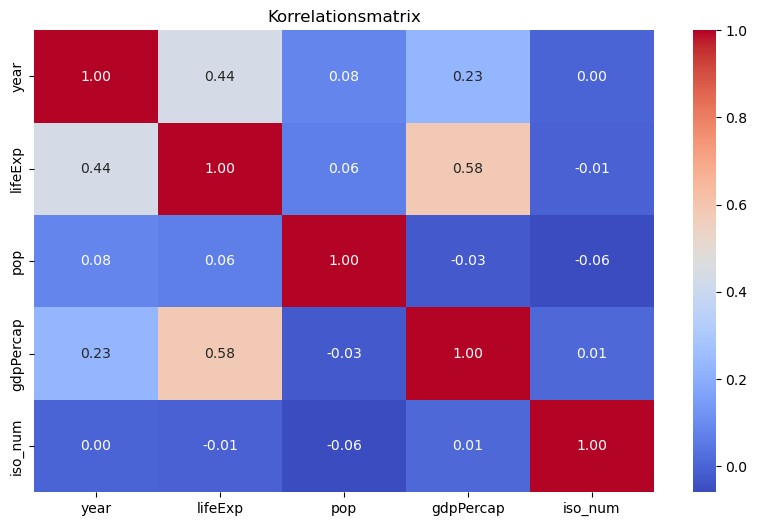

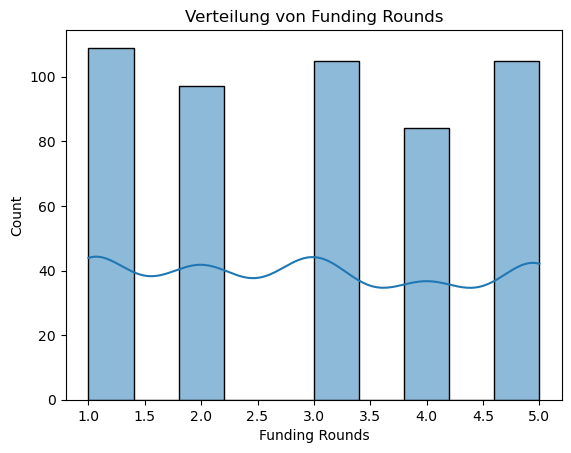

In [30]:
# Heatmap der Korrelationen
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix")
plt.show()

# Beispiel-Verteilung für erste numerische Spalte (robust gegen KeyError)
plot_df = df
if 'numeric_cols' in globals():
	# Falls keine der erwarteten Spalten in df ist, aber eff_df existiert → auf eff_df wechseln
	if len([c for c in numeric_cols if c in df.columns]) == 0 and 'eff_df' in globals():
		plot_df = eff_df

numeric_cols_plot = plot_df.select_dtypes(include=[np.number]).columns
if len(numeric_cols_plot):
	num_col = numeric_cols_plot[0]
	sns.histplot(plot_df[num_col], kde=True)
	plt.title(f"Verteilung von {num_col}")
	plt.show()
else:
	print("Keine numerischen Spalten zum Plotten vorhanden.")


# Teil 2: Datenaufbereitung & Feature Engineering

## 2.1 Datenaufbereitung
## 2.1.1 Fehlende Werte

Fehlende Werte (Missing Values) können die Datenqualität eines Datensatzes erheblich beeinträchtigen und zu verzerrten (biased) Analyseergebnissen führen. Daher ist eine systematische Identifikation und Behandlung unerlässlich.

###  Analyseschritte:

1. **Identifikation**: 

    Die Anzahl und der Anteil der fehlenden Werte pro Spalte lassen sich mithilfe der Funktionen `df.isnull().sum()` und `df.isnull().mean()` aus der pandas-Bibliothek bestimmen. Erstere Funktion gibt dabei die Anzahl der fehlenden Werte und die zweite Funktion gibt den Anteil der fehlenden Werte als Dezimalzahl aus.
    Anschließend werden fehlende Werte beispielsweise durch eine Heatmap oder ein Balkendiagramm visualisiert.

2. **Mustererkennung**:

    Um die fehlenden Werte zu verstehen, werden statistische Tests und Visualisierungen eingesetzt. Dabei wird zwischen verschiedenen Fehlermechanismen unterschieden: MCAR (Missing Completely At Random) liegt vor, wenn Werte völlig zufällig fehlen und keine systematischen Zusammenhänge bestehen. MAR (Missing At Random) bedeutet, dass fehlende Werte durch andere beobachtbare Variablen erklärt werden können. MNAR (Missing Not At Random) beschreibt den Fall, dass das Fehlen selbst mit dem unbeobachteten Wert zusammenhängt.
    Diese Unterscheidung ist entscheidend für die Wahl der richtigen Behandlungsmethode, da verschiedene Fehlermechanismen unterschiedliche Imputation-Strategien erfordern.

3. **Bewertung der Relevanz**:

    Die Kontextanalyse fehlender Werte erfolgt durch Prüfung der fachlichen Bedeutung und möglicher Ursachen. Dabei wird unterschieden zwischen informativ fehlenden Werten, die bewusst nicht erfasst wurden (z.B. "keine Angabe" bei freiwilligen Angaben oder fehlende Umsatzdaten bei Start-ups in frühen Phasen) und technisch bedingten Fehlern durch Probleme bei der Datenerhebung oder -übertragung. Die domänenspezifische Bewertung berücksichtigt branchenübliche Praktiken und regulatorische Anforderungen.
    Diese Analyse bestimmt, ob fehlende Werte als eigenständiges Signal behandelt oder durch Imputation ersetzt werden sollten.

###  Behandlungsmethoden:

1. **Entfernen**:

    Das vollständige Entfernen von Zeilen oder Spalten mit fehlenden Werten (`df.dropna()`) ist die einfachste Behandlungsmethode, birgt jedoch das Risiko erheblichen Informationsverlustes. Diese Methode eignet sich nur, wenn der Anteil betroffener Datenpunkte sehr gering ist (typischerweise unter 5%) und das Fehlermuster als MCAR klassifiziert wurde. Bei größeren Datensätzen bleibt die statistische Power meist erhalten, während bei kleineren Datensätzen jede entfernte Zeile die Analysefähigkeit beeinträchtigen kann.
    Die zeilenweise Löschung wird bevorzugt, wenn einzelne Beobachtungen mehrere fehlende Werte aufweisen. Das spaltenweise Entfernen wird nur bei irrelevanten oder überwiegend fehlenden Features in Betracht gezogen.

2. **Imputation (Auffüllen)**:

    Die Imputation ersetzt fehlende Werte durch geschätzte Ersatzwerte, um den vollständigen Datensatz zu erhalten. Die Wahl der Imputationsmethode hängt stark vom Datentyp und der Verteilung ab:
    
    - **Numerische Spalten**: Bei numerischen Features (z.B. Umsatz, Mitarbeiterzahl, Bewertung) werden typischerweise zentrale Lagemaße verwendet. Der **Median** ist robust gegenüber Ausreißern und wird bevorzugt bei schiefen Verteilungen, während der **Mittelwert** bei normalverteilten Daten ohne extreme Werte geeignet ist. Für komplexere Muster können erweiterte Methoden wie KNN-Imputation (nutzt ähnliche Beobachtungen) oder iterative Imputation (MICE - Multiple Imputation by Chained Equations) eingesetzt werden, die Zusammenhänge zwischen Features berücksichtigen.
    
    - **Kategorische Spalten**: Bei kategorialen Features (z.B. Industrie, Region, Exit-Status) wird meist der **Modus** (häufigster Wert) verwendet, da dieser die dominante Kategorie im Datensatz widerspiegelt. Alternativ kann eine eigene Kategorie wie "Unbekannt" oder "Fehlend" erstellt werden, wenn das Fehlen selbst eine bedeutsame Information darstellen könnte (z.B. "keine Angabe" bei freiwilligen Feldern).

3. **Indikator-Variable**:

    Eine zusätzliche binäre Spalte (z.B. `Spalte_missing`) wird erstellt, die mit 1 (True) markiert, ob der ursprüngliche Wert fehlte, und mit 0 (False), wenn er vorhanden war. Diese Methode ist besonders nützlich, wenn das Fehlen selbst eine Information trägt – beispielsweise könnte das Fehlen von Umsatzdaten bei Start-ups in sehr frühen Phasen ein Signal für die Entwicklungsstufe sein. Die Indikator-Variable wird oft in Kombination mit Imputation verwendet, um sowohl den geschätzten Wert als auch die Information über das ursprüngliche Fehlen zu bewahren.

**Entscheidungskriterien**:
- Anteil fehlender Werte: <5% → eventuell löschen; 5-20% → Imputation erwägen; >20% → Feature möglicherweise unbrauchbar
- Geschäftskontext: Kann das Fehlen eines Werts bedeutsam sein?
- Modellrobustheit: Manche Algorithmen (z.B. XGBoost) können mit Missing Values umgehen


In [3]:
# Analyseschritt 1: Identifikation fehlender Werte
# Ziel: Systematische Erfassung und Visualisierung fehlender Werte im Datensatz

# Anzahl fehlender Werte pro Spalte berechnen
missing_counts = df.isnull().sum()

# Anteil fehlender Werte pro Spalte berechnen (als Dezimalzahl zwischen 0 und 1)
missing_ratio = df.isnull().mean()

# Übersichtstabelle erstellen mit absoluten und relativen Häufigkeiten
missing_summary = pd.DataFrame({
    'Anzahl_fehlend': missing_counts,
    'Anteil_fehlend': missing_ratio,
    'Prozent_fehlend': missing_ratio * 100
}).sort_values('Anzahl_fehlend', ascending=False)

# Nur Spalten mit fehlenden Werten anzeigen (Anzahl > 0)
missing_summary = missing_summary[missing_summary['Anzahl_fehlend'] > 0]

print("Übersicht fehlender Werte:")
print(missing_summary)

# Visualisierung: Balkendiagramm
if not missing_summary.empty:
    # Horizontales Balkendiagramm für bessere Lesbarkeit bei vielen Spalten
    plt.figure(figsize=(10, 6))
    missing_summary['Prozent_fehlend'].plot(kind='barh', color='coral')
    plt.xlabel('Prozent fehlender Werte (%)')
    plt.ylabel('Spalte')
    plt.title('Anteil fehlender Werte pro Spalte')
    plt.tight_layout()
    plt.show()
    
    # Heatmap für fehlende Werte über den gesamten Datensatz
    # Gelbe Bereiche = fehlende Werte, dunkle Bereiche = vorhandene Werte
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Heatmap fehlender Werte (gelb = fehlend)')
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ Keine fehlenden Werte im Datensatz gefunden!")

NameError: name 'df' is not defined

## 2.1.2 Ausreißer

Ausreißer (Outliers) sind Datenpunkte, die sich deutlich von der Mehrheit der Beobachtungen unterscheiden und können die statistische Analyse sowie Modellbildung erheblich beeinflussen. Eine systematische Identifikation und kontextuelle Bewertung ist daher für robuste Analyseergebnisse unerlässlich.

###  Analyseschritte:

1. **Identifikation**:

    Die Interquartilsabstand-Methode (IQR-Methode) ist eine robuste statistische Technik zur Ausreißererkennung. Dabei werden zunächst das erste Quartil (Q1 = 25%) und das dritte Quartil (Q3 = 75%) berechnet, aus denen sich der IQR = Q3 − Q1 ergibt. Werte, die außerhalb der Grenzen Q1 − 1.5×IQR (untere Grenze) oder Q3 + 1.5×IQR (obere Grenze) liegen, werden als moderate Ausreißer klassifiziert.
    Diese Schwellen basieren auf der Normalverteilungsannahme und markieren etwa 0.7% der extremsten Werte bei normalverteilten Daten.

2. **Mustererkennung**:

    Nach der Identifikation werden Ausreißermuster über Features hinweg analysiert, um systematische Zusammenhänge zu erkennen. Einzelne Datenpunkte, die in mehreren Features gleichzeitig als Ausreißer erscheinen, deuten auf besondere Beobachtungen hin (z.B. außergewöhnlich erfolgreiche Unicorns). Visualisierungen wie Boxplots, Scatterplots oder Heatmaps helfen, die Verteilung und Häufung von Ausreißern zu verstehen.
    Die Analyse unterscheidet zwischen univariaten Ausreißern (einzelne Variable) und multivariaten Ausreißern (Kombination mehrerer Variablen).

3. **Bewertung der Relevanz**:

    Die Interpretation von Ausreißern erfordert Domänenwissen, um zwischen Messfehlern und echten Extremwerten zu unterscheiden. Bei Start-up-Daten können extrem hohe Bewertungen oder Umsätze legitime Unicorns repräsentieren, während unrealistische Werte auf Datenerhebungsfehler hindeuten. Die fachliche Bewertung berücksichtigt Branchenstandards, zeitliche Entwicklungen und Plausibilität der Wertekombinationen.
    Diese Analyse bestimmt, ob Ausreißer als wertvolle Informationen erhalten, korrigiert oder aus der Analyse ausgeschlossen werden sollten.

###  Behandlungsmethoden:

1. **Belassen**:

    Ausreißer werden unverändert beibehalten, wenn sie echte, wertvolle Extremfälle repräsentieren (z.B. außergewöhnlich erfolgreiche Start-ups oder disruptive Geschäftsmodelle). Diese Methode ist angebracht, wenn das Analyseziel explizit die Identifikation von Ausnahmefällen einschließt oder wenn robuste statistische Verfahren verwendet werden, die gegen Ausreißer unempfindlich sind (z.B. Median statt Mittelwert, robuste Regression).
    Viele moderne Machine-Learning-Algorithmen wie Random Forests oder Gradient Boosting sind von Natur aus robust gegenüber Ausreißern.

2. **Transformation**:

    Durch mathematische Transformationen wie Logarithmierung (`log(x)`), Wurzelbildung (`sqrt(x)`) oder Box-Cox-Transformation können stark schiefe Verteilungen mit Ausreißern normalisiert werden. Diese Methode komprimiert den Wertebereich und reduziert den Einfluss extremer Werte, ohne Informationen vollständig zu verlieren. Winsorisierung begrenzt Extremwerte auf definierte Perzentile (z.B. 1. und 99. Perzentil), während Standardisierung (z-Scores) Werte auf eine gemeinsame Skala bringt.
    Die Wahl der Transformation hängt von der Verteilung der Daten und den Anforderungen nachgelagerter Analysen ab.

3. **Entfernen oder Separieren**:

    Das vollständige Entfernen von Ausreißern ist die radikalste Methode und sollte nur nach gründlicher Analyse erfolgen. Diese Vorgehensweise ist gerechtfertigt bei nachgewiesenen Messfehlern, Dateneingabefehlern oder wenn Ausreißer die Forschungsfrage verfälschen würden. Alternativ können Ausreißer in einer separaten Analyse behandelt werden, um sowohl Haupttrends als auch Extremfälle zu verstehen.
    Dokumentation ist entscheidend: jede Entfernung sollte begründet und nachvollziehbar sein, um die Reproduzierbarkeit der Analyse zu gewährleisten.

**Entscheidungskriterien**:
- Anzahl der Ausreißer: Wenige isolierte Fälle → prüfen und ggf. entfernen; Viele Ausreißer → Transformation erwägen
- Fachlicher Kontext: Sind extreme Werte plausibel oder Fehler?
- Analyseziel: Sollen Extremfälle explizit untersucht werden (z.B. Unicorn-Identifikation)?
- Methodenrobustheit: Manche Verfahren (Median, robuste Regression, Tree-based Models) sind ausreißerresistent


In [ ]:
# Ausreißer-Identifikation (IQR-Methode) auf numerischen Features
# Ziel: Für jede numerische (nicht-binäre) Spalte IQR berechnen und Ausreißer nach 1.5x IQR markieren.

# Numerische Spalten bestimmen und binäre Variablen (z.B. Profitable) ausschließen
_numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()  # alle numerischen Spalten
_binary_cols = [c for c in _numeric_cols if df[c].dropna().nunique() <= 2]  # Spalten mit <=2 eindeutigen Werten (binär)
num_cols_iqr = [c for c in _numeric_cols if c not in _binary_cols]  # nur echte numerische Features (keine 0/1 Indikatoren)

# IQR-Grenzen berechnen und Ausreißer-Masken (1.5x IQR) erstellen
outlier_records = []  # speichern von Q1/Q3/IQR und Ausreißerstatistiken pro Feature
outlier_mask_15 = pd.DataFrame(False, index=df.index, columns=num_cols_iqr)  # bool-matrix: True = Ausreißer (1.5x)

for col in num_cols_iqr:
    # Quartile berechnen (Q1=25%, Q3=75%) und IQR bestimmen
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1  # Interquartilsabstand (Robuste Maßzahl für Streuung)

    # Falls IQR nicht definiert (z.B. konstante Spalte) → keine Schwellen setzen
    if pd.isna(iqr) or iqr == 0:
        lower15 = upper15 = np.nan
        cnt15 = 0
    else:
        # Schwellen für moderate (1.5x) Ausreißer festlegen
        lower15, upper15 = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        # Masken setzen: True, wenn Wert außerhalb der Grenzen liegt
        outlier_mask_15[col] = (df[col] < lower15) | (df[col] > upper15)
        # Anzahl der Ausreißer pro Feature zählen (für Reporting)
        cnt15 = int(outlier_mask_15[col].sum())

    # Statistik-Eintrag für dieses Feature (wird später zu einem DataFrame)
    outlier_records.append({
        'Feature': col,
        'Q1': q1, 'Q3': q3, 'IQR': iqr,
        'Lower_1.5IQR': lower15, 'Upper_1.5IQR': upper15,
        'Outliers_1.5IQR': cnt15,
        'Outlier_% (1.5IQR)': round(cnt15 / len(df) * 100, 2) if len(df) else 0.0,
    })

# Zusammenfassung: DataFrame mit den Ausreißer-Statistiken pro Feature
outlier_summary = (
    pd.DataFrame(outlier_records)
    .set_index('Feature')
    .sort_values('Outliers_1.5IQR', ascending=False)
)

print("Ausreißer-Zusammenfassung pro Feature (IQR-basiert):")
print(outlier_summary)

# Zeilen mit den meisten Ausreißern (über alle Features) bestimmen
row_outlier_counts = outlier_mask_15.sum(axis=1)  # Anzahl einziger Features mit Ausreißer pro Zeile
rows_with_outliers = row_outlier_counts[row_outlier_counts > 0].sort_values(ascending=False)

if not rows_with_outliers.empty:
    # Kontextspalten auswählen, falls vorhanden (für bessere Interpretation der betroffenen Zeilen)
    key_cols = [c for c in ['Startup Name', 'Industry', 'Region', 'Exit Status'] if c in df.columns]
    preview_cols = key_cols + num_cols_iqr
    top_rows = rows_with_outliers.index[:15]  # Top 15 problematische Zeilen

    print("\nTop-Zeilen mit den meisten Ausreißern (1.5x IQR):")
    display(
        df.loc[top_rows, preview_cols]
          .assign(Outlier_Count=row_outlier_counts.loc[top_rows])
          .sort_values('Outlier_Count', ascending=False)
    )
else:
    print("\nKeine Ausreißer nach 1.5x IQR-Regel gefunden.")


## 2.2 Feature Engineering 
## 2.2.1 Data Dictionary

###  **Übersicht**
- **Datensatzgröße:** 500 Startups
- **Anzahl Variablen:** 12
- **Fehlende Werte:** 0 (100% Vollständigkeit)
- **Zeitraum:** Gründungsjahre 1990–2022

---

###  **Variablenbeschreibung**

| **Variable** | **Typ** | **Beschreibung** | **Wertebereich / Kategorien** | **Verwendung** |
|--------------|---------|------------------|-------------------------------|----------------|
| **Startup Name** | Text (object) | Eindeutiger Identifikator für jedes Startup | 500 unique Namen (Startup_1 bis Startup_500) | Identifikation einzelner Unternehmen |
| **Industry** | Kategorial (object) | Branchenzugehörigkeit des Startups | 8 Kategorien: EdTech (74), FinTech (71), HealthTech, E-Commerce, AI/ML, CleanTech, Cybersecurity, FoodTech | Branchenspezifische Analysen, Segmentierung |
| **Funding Rounds** | Numerisch (int64) | Anzahl der abgeschlossenen Finanzierungsrunden | 5 unique Werte (diskret) | Indikator für Entwicklungsphase und Investorenvertrauen |
| **Funding Amount (M USD)** | Numerisch (float64) | Gesamtfinanzierungssumme in Millionen USD | Kontinuierlich, 494 unique Werte | Kapitalbedarf und Investitionsvolumen |
| **Valuation (M USD)** | Numerisch (float64) | Unternehmensbewertung in Millionen USD | 2.43 – 4,357.49 M USD, 500 unique Werte | Marktwert, Unicorn-Identifikation (>1,000 M USD) |
| **Revenue (M USD)** | Numerisch (float64) | Jahresumsatz in Millionen USD | Kontinuierlich, 490 unique Werte | Profitabilität, Geschäftserfolg |
| **Employees** | Numerisch (int64) | Anzahl der Mitarbeiter | 478 unique Werte | Unternehmensgröße, Skalierung |
| **Market Share (%)** | Numerisch (float64) | Marktanteil in Prozent | 0–100%, 384 unique Werte | Wettbewerbsposition, Marktdominanz |
| **Profitable** | Binär (int64) | Profitabilitätsstatus (0 = nicht profitabel, 1 = profitabel) | 0: 284 Startups (56.8%)<br>1: 216 Startups (43.2%) | **Zielvariable** für Klassifikationsmodelle |
| **Year Founded** | Numerisch (int64) | Gründungsjahr des Startups | 1990–2022 (33 unique Jahre) | Zeitliche Analysen, Kohorten-Effekte |
| **Region** | Kategorial (object) | Geografische Region des Hauptsitzes | 5 Kategorien: Australia (108), North America, Europe, Asia, South America | Regionale Vergleiche, geografische Segmentierung |
| **Exit Status** | Kategorial (object) | Aktueller Exit-Status des Unternehmens | 3 Kategorien: Private (348), IPO, Acquired | Exit-Strategie, Investitionserfolg |

## 2.3 Dokumentation

# Teil 3: Modellierung und Evaluation

## 3.1 Modellauswahl

# Vorhersage profitabler Startups mit Decision Trees

> *„Welche Startups sind mit hoher Wahrscheinlichkeit ein profitables Investment?“*

Im Fokus stehen dabei:
1. Feature Engineering
2. Implementierung und Begründung eines Modells (Decision Tree)
3. Angemessene Metriken zur Evaluierung des Modells
4. Diskussion von Overfitting und Underfitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    roc_auc_score,
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
)

# Auswertungseinstellungen
TOP_K = 10       # Wie viele Topunternehmen sollen angezeigt werden
RNG = 42         # Zufallszahl für Reproduzierbarkeit
THRESHOLD = 0.6  # Schwelle, ab der ein Startup als profitabel (1) klassifiziert wird

## 1. Feature Engineering und Erstellung des Modelldatenrahmens

In diesem Schritt werden die Rohdaten so vorbereitet, dass sie für ein ML-Modell nutzbar werden. Entsprechend der Vorlesung zu **Datenaufbereitung & Feature Engineering** werden:

- die **Zielvariable** `Profitable` definiert,
- relevante **numerische** und **kategorische** Features ausgewählt,
- zusätzliche Kennzahlen über **Feature Engineering** abgeleitet,
- Trainings- und Testdaten mit `train_test_split` erstellt.

Wichtig ist dabei, **keine Informationen zu verwenden, die erst nach der Investitionsentscheidung bekannt wären**, z. B. Exit-Status oder tatsächliche Profitabilität. Sonst würde das Modell „in die Zukunft schauen“.

In [ ]:
# --- Daten laden ---
df = pd.read_csv("startup_data.csv")
y = df["Profitable"].astype(int)

df_model = df.copy()

# --- Features, die ans Modell übergeben werden sollen ---

# numerisch
num = [
    "Funding Rounds", "Funding Amount (M USD)", "Valuation (M USD)",
    "Revenue (M USD)", "Employees", "Market Share (%)", "Year Founded"
]

# kategorisch
cat = ["Industry", "Region"]

# Wichtig: Es werden nur Merkmale verwendet, die vor einer Investition bekannt sind.
# Exit-Status oder tatsächliche Profitabilität bleiben explizit außen vor.

# --- Feature-Engineering-Schritte ---

# Verhältnis zwischen Finanzierungsbetrag und Anzahl an Finanzierungsrunden
df_model["Funding_per_Round"] = df["Funding Amount (M USD)"] / df["Funding Rounds"].clip(lower=1)

# Verhältnis zwischen Umsatz und Mitarbeiterzahl (Produktivität)
df_model["Rev_per_Emp"] = df["Revenue (M USD)"] / df["Employees"].clip(lower=1)

# Verhältnis zwischen Umsatz und Finanzierungsbetrag (Kapital-Effizienz)
df_model["Capital_Eff"] = df["Revenue (M USD)"] / df["Funding Amount (M USD)"]

# Verhältnis zwischen Umsatz und Unternehmensbewertung
df_model["Revenue_to_Valuation"] = df["Revenue (M USD)"] / df["Valuation (M USD)"].replace(0, np.nan)

# Neue Features zur numerischen Feature-Liste hinzufügen
num += [
    "Funding_per_Round",
    "Rev_per_Emp",
    "Capital_Eff",
    "Revenue_to_Valuation",
]

# Finale Feature-Matrix
X = df_model[num + cat].copy()

# --- Train/Test-Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    stratify=y,
    random_state=RNG
)

X_train.shape, X_test.shape

## 2. Implementierung und Begründung des Modells

Für die Klassifikation wird ein **Decision Tree Classifier** verwendet. Diese Wahl ist im Kontext der Vorlesung begründbar durch:

- **Interpretierbarkeit:** Entscheidungsbäume lassen sich als Entscheidungsregeln erklären (z. B. „Wenn Market Share > x und Funding Rounds < y, dann …“).
- **Umgang mit nichtlinearen Zusammenhängen:** Bäume können Interaktionen zwischen Features abbilden.
- **Klares Bias/Varianz-Verhalten:** Bäume sind gut geeignet, um Overfitting/Underfitting zu diskutieren (z. B. über `max_depth`).

Die Vorverarbeitung wird in einer **Pipeline** gebündelt:
- Numerische Daten: Imputation mit Median + Min-Max-Skalierung
- Kategorische Daten: Imputation mit häufigstem Wert + One-Hot-Encoding
- Anschließend wird der Decision Tree auf die transformierten Features trainiert.

In einer echten Anwendung würde ich statt diesen Methoden Startups mit fehlenden Werten lieber ganz streichen, da ein True Negative schwerer wiegt im Investitionszusammenhang als ein False Positive.

Allerdings wird in einem kleinen Datensatz (wie hier), durch die Imputation die Modellgenauigkeit erhöht, auch wenn hier keine Werte fehlen.

In [ ]:
# --- Pipeline zur Vorverarbeitung ---

# Numerischer Zweig: Imputation + MinMax-Skalierung
num_pre = Pipeline([
    ("imp", SimpleImputer(strategy="median")),     # Fehlende numerische Werte -> Median
    ("scale", MinMaxScaler(feature_range=(0, 1)))  # Skalierung auf [0,1], reduziert Skalen-Bias
])

# Kategorialer Zweig: Imputation + One-Hot-Encoding
cat_pre = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),  # Fehlende Kategorien -> häufigster Wert
    ("ohe", OneHotEncoder(handle_unknown="ignore"))    # One-Hot-Encoding, unbekannte Kategorien ignorieren
])

pre = ColumnTransformer([
    ("num", num_pre, num),
    ("cat", cat_pre, cat)
])

# --- Decision Tree Modell ---
tree = DecisionTreeClassifier(
    max_depth=7,          # Begrenzung der Tiefe zur Vermeidung von Overfitting
    min_samples_leaf=40,  # Mindestanzahl von Startups pro Blatt
    criterion="gini",     # Gini-Index als Reinheitsmaß
    random_state=RNG
)

# Gesamte Pipeline: Preprocessing + Modell
pipe = Pipeline([("prep", pre), ("model", tree)])

# Training
pipe.fit(X_train, y_train)

# Vorhersage von Wahrscheinlichkeiten (Klasse 1 = profitabel)
y_train_proba = pipe.predict_proba(X_train)[:, 1]
y_test_proba  = pipe.predict_proba(X_test)[:, 1]
y_test_pred   = (y_test_proba >= THRESHOLD).astype(int)

## 3. Modellbewertung: geeignete Metriken

Entsprechend der Vorlesung zu **Modellbewertung (Tag 8)** wird das Modell mit mehreren Metriken beurteilt:

- **ROC-AUC**: misst, wie gut das Modell zwischen profitabel/nicht profitabel unterscheidet.
- **Accuracy**: Anteil der korrekt klassifizierten Startups.
- **Precision (Positiv-Präzision)**: *„Wie viele der als profitabel vorhergesagten Startups waren tatsächlich profitabel?“*  
  → wichtig, um **Fehlinvestitionen (False Positives)** zu begrenzen.
- **Recall (Sensitivität)**: *„Wie viele der tatsächlich profitablen Startups wurden vom Modell erkannt?“*  
  → wichtig, um **verpasste Chancen (False Negatives)** zu reduzieren.
- **Confusion Matrix**: detaillierte Übersicht über TP, FP, FN, TN.  
  Hier zusätzlich mit **Business-Begriffen** visualisiert (gutes Investment, verpasste Chance, schlechtes Investment, erkanntes Minusgeschäft).

In [ ]:
# --- ROC-AUC ---
roc_train = roc_auc_score(y_train, y_train_proba)
roc_test  = roc_auc_score(y_test,  y_test_proba)

print(f"ROC-AUC Train: {roc_train:.3f}")
print(f"ROC-AUC Test : {roc_test:.3f}\n")


# --- Klassifikationsmetriken ---
acc  = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec  = recall_score(y_test, y_test_pred)

print("Test-Metriken:")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")


# --- Confusion-Matrix mit Business-Begriffen ---
cm = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, cmap="Blues")


ax.set_xlabel("Vorhersage des Modells")
ax.set_ylabel("Tatsächlicher Status")


ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Nicht profitabel (0)", "Profitabel (1)"])
ax.set_yticklabels(["Nicht profitabel (0)", "Profitabel (1)"])

ax.set_title(
    "Confusion Matrix Gutes Investment (TP), "

    "Verpasste Chance (FN),\n"

    "Schlechtes Investment (FP), Erkanntes Minusgeschäft (TN)"
)

business_labels = [
    ["Erkanntes Minusgeschäft\n(TN)", "Schlechtes Investment\n(FP)"],
    ["Verpasste Chance\n(FN)", "Gutes Investment\n(TP)"]
]

for i in range(2):
    for j in range(2):
        text = f"{business_labels[i][j]}\n{cm[i, j]}"
        ax.text(
            j, i,
            text,
            ha="center",
            va="center",
            color="black",
            fontsize=8
        )

fig.tight_layout()
plt.show()

##  Diskussion von Overfitting und Underfitting

Dieses Modell lässt sich abhängig von den Hyperparametern wiefolgt einordnen:

- Ein **zu komplexer Baum** (sehr große `max_depth`, kleine `min_samples_leaf`) würde
  - die Trainingsdaten fast perfekt trennen (sehr hohe ROC-AUC/Accuracy im Training),
  - aber auf den Testdaten deutlich schlechter abschneiden → **Overfitting (hohe Varianz)**.

- Ein **zu einfacher Baum** (sehr kleine `max_depth`, große `min_samples_leaf`) würde
  - sowohl auf Trainings- als auch Testdaten eher schlechte Werte liefern,
  - weil die Modellkapazität nicht ausreicht, die Zusammenhänge abzubilden → **Underfitting (hoher Bias)**.

In diesem Modell haben wir versucht einen **Kompromiss** zu finden:

- `max_depth = 7` begrenzt die Komplexität des Baums.
- `min_samples_leaf = 40` sorgt dafür, dass Blätter nicht nur auf sehr wenigen Startups basieren.

betrachteten wir unsere Metriken für unsere gewählten Hyperparamater kommen wir zum Schluss:

ROC-AUC Train: 0.687  trennt im Training okay, aber nicht stark. Erkennt Muster aber nicht Trennungsscharf.

ROC-AUC Test : 0.579  trennt im Test kaum besser als Zufall. 

-> Differenz ROC-AUC Training/Test = 0,108  Mittelgroßer Unterschied zwischen Test und Trainingserfolg.

Accuracy : 0.600     60% Aller Startups korrekt Klassifiziert, okay aber nicht Gut wenn man die Risiken abwägt.

Precision: 0.559   Nur 55,9% der als profitablen hervorgesagten Startups waren korrekt. Viele False Positives und somit für Investoren  sehr gefährlich.

Recall   : 0.352     Das Modell erkennt gerade mal 35,2% der tatsächlich profitablen Startups im Test.

**Fazit**

Das Modell overfittet ein wenig, weil die Differenz zwischen Test und Training mittelgroß ist.
Gleichzeitig underfittet es, weil beide Werte insgesamt schlecht sind.

**Gründe**

-Der Datensatz enthält gerademal 500 Startups. Die einzelnen Kombinationen von Region, Industrie, etc. sind so gering dass das Modell nicht genug Muster finden kann.

-Gleichzeitig sind die Umstände der Startups, wie Trends (zB. AI), Wirtschaftsschwankungen oder einfach Startupeinzigartige Qualitäten im Datensatz ebenfalls nicht erfasst.

-Das Modell ist mit diesem Datensatz nicht praxistauglich

## 4. Feature Importance des Decision Trees

Um das Modell besser erklären zu können (Explainable AI), wird die **Feature Importance** des Decision Trees ausgewertet.

- Sie zeigt, welche Features besonders stark zur Trennung der Klassen beitragen.
- So lassen sich fachliche Fragen beantworten wie:
  - Welche Rolle spielt der **Marktanteil**?
  - Wie wichtig sind **Finanzierungsrunden** oder **Kapital-Effizienz**?
  - Welche Branchen oder Regionen sind im Modell besonders relevant?

So kann Vertrauen zu den Investoren aufgebaut werden weil sie nicht auf eine Blackbox vertrauen müssen.
Gleichzeitig ermöglicht es ihnen festzustellen ob sie anders ihre Entscheidungen treffen als das Modell.

In [ ]:
# Zugriff auf das trainierte Baum-Modell und den One-Hot-Encoder
best_tree = pipe.named_steps["model"]
ohe = pipe.named_steps["prep"].named_transformers_["cat"].named_steps["ohe"]

# Feature-Namen: numerische Features + One-Hot-Features
feature_names = num + list(ohe.get_feature_names_out(cat))
importances = best_tree.feature_importances_

imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=True)

plt.figure(figsize=(10, max(6, len(imp_df) * 0.25)))
plt.barh(imp_df["Feature"], imp_df["Importance"])
plt.xlabel("Wichtigkeit im Modell")
plt.ylabel("Feature")
plt.title("Feature Importance – Decision Tree Classifier")
plt.tight_layout()
plt.show()

imp_df.sort_values("Importance", ascending=False).head(10)

# Teil 4 Kritische Reflexion & Geschäftsempfehlung

## 4.1 Geschäftsempfehlung

## 4.2 Kritische Fragen und weiterführende Analyseschritte

### 🔍 **Kritische Fragen, die die Analyse aufwirft**

#### **1. Datenqualität und Repräsentativität**
- **Wie repräsentativ ist der Datensatz?** Mit nur 500 Startups aus verschiedenen Branchen und Regionen – bildet dieser Ausschnitt wirklich die globale Startup-Landschaft ab oder ist er systematisch verzerrt?
- **Warum gibt es keine fehlenden Werte?** Ist das ein Zeichen für hochqualitative Datenerfassung oder wurden Daten künstlich bereinigt/ergänzt, wodurch wichtige Informationen verloren gingen?
- **Survivorship Bias:** Fehlen gescheiterte Startups komplett im Datensatz? Wenn ja, wie verzerrt das unsere Erfolgswahrscheinlichkeiten?

#### **2. Zeitliche Dynamik**
- **Wie werden Kohorteneffekte berücksichtigt?** Startups aus dem Jahr 1990 vs. 2020 operieren in völlig unterschiedlichen Marktbedingungen (Dotcom-Blase, Finanzkrise, COVID-19, AI-Boom) – ist ein direkter Vergleich überhaupt sinnvoll?
- **Wann wurde die Profitabilität gemessen?** Ein 30 Jahre altes Startup hat andere Profitabilitätschancen als ein 3 Jahre altes – fehlt hier eine zeitliche Normalisierung?
- **Wie dynamisch sind die Daten?** Werden aktuelle Markttrends (z.B. AI-Hype 2023-2025) erfasst oder ist der Datensatz veraltet?

#### **3. Modellleistung und Praktikabilität**
- **Warum ist die Modellperformance so schwach?** Mit nur 60% Accuracy und 35% Recall – ist das Modell überhaupt besser als zufälliges Raten (50%)? Woran liegt das?
- **Sind die Features ausreichend?** Welche wichtigen Erfolgsfaktoren fehlen (Gründerteam-Erfahrung, Netzwerkeffekte, Technologie-Stack, Wettbewerbsintensität)?
- **Ist die Zielvariable "Profitable" zu vereinfacht?** Binäre Klassifikation ignoriert Grade der Profitabilität – sollten wir stattdessen ROI oder Exit-Multiplikatoren vorhersagen?

#### **4. Kausalität vs. Korrelation**
- **Sind die identifizierten Zusammenhänge kausal?** Beispiel: Hoher Marktanteil → Profitabilität oder Profitabilität → ermöglicht Marktanteilsgewinn?
- **Gibt es Confounding Variables?** Könnten externe Faktoren (Makroökonomie, regulatorische Änderungen) sowohl Finanzierung als auch Erfolg beeinflussen?
- **Selection Bias bei Finanzierung:** Erhalten bereits erfolgreiche Startups mehr Funding, oder führt mehr Funding zu Erfolg?

#### **5. Geschäftliche Anwendbarkeit**
- **Sind die Empfehlungen umsetzbar?** Ein Investor kann nicht direkt "Marktanteil erhöhen" – welche konkreten, kontrollierbaren Hebel gibt es?
- **Kosten-Nutzen-Verhältnis:** Was kostet es, ein False Positive (schlechtes Investment) vs. False Negative (verpasste Chance) zu haben? Sollte der Schwellenwert angepasst werden?
- **Wie verhält sich das Modell bei neuen Branchen?** EdTech/FinTech dominieren den Datensatz – funktioniert das Modell auch für Web3, Quantum Computing oder Biotech?

#### **6. Ethische und strategische Überlegungen**
- **Verstärkt das Modell bestehende Ungleichheiten?** Werden Startups aus unterrepräsentierten Regionen (z.B. Afrika, Südamerika mit nur ~100 Beobachtungen) systematisch benachteiligt?
- **Self-Fulfilling Prophecy:** Wenn alle Investoren dasselbe Modell nutzen – führt das zu Herdenverhalten und Blasenbildung in bestimmten Sektoren?
- **Qualitative Faktoren:** Wie bewerten wir Teamqualität, Vision, Anpassungsfähigkeit – Faktoren, die oft erfolgsent­scheidend sind, aber nicht im Datensatz erscheinen?

---

### 🚀 **Nächste Schritte für eine erweiterte Analyse**

#### **Phase 1: Datenakquisition und -erweiterung**
1. **Größeren Datensatz beschaffen**
   - Mindestens 5.000-10.000 Startups für robustere Muster
   - Inklusive gescheiterter Startups zur Vermeidung von Survivorship Bias
   - Longitudinale Daten (mehrere Zeitpunkte pro Startup) statt nur Momentaufnahmen

2. **Zusätzliche Features integrieren**
   - **Gründer-Features:** Ausbildung, Vorerfahrung, Serial Entrepreneurs, Team-Diversität
   - **Qualitative Metriken:** Produkt-Market-Fit Indikatoren, Customer Satisfaction Scores
   - **Makroökonomische Variablen:** GDP-Wachstum, Zinssätze, VC-Funding-Volumen pro Jahr/Region
   - **Wettbewerbs-Metriken:** Anzahl Konkurrenten, Marktkonzentration (HHI), Eintrittsbarrieren
   - **Technologie-Indikatoren:** Patente, GitHub-Aktivität, Tech-Stack-Modernität

3. **Externe Datenquellen einbinden**
   - Crunchbase, PitchBook, AngelList für umfassendere Funding-Historie
   - Social Media Sentiment (Twitter/LinkedIn) für Brand Perception
   - News-Artikel und PR-Events (NLP-Analyse) für Momentum-Indikatoren

#### **Phase 2: Erweiterte Modellierungstechniken**
4. **Ensemble-Methoden testen**
   - **Random Forest:** Reduziert Overfitting, bessere Performance bei kleinen Datensätzen
   - **Gradient Boosting (XGBoost, LightGBM):** State-of-the-Art für strukturierte Daten
   - **Stacking:** Kombiniere Decision Trees, Logistische Regression, Neural Networks

5. **Survival Analysis statt binärer Klassifikation**
   - **Cox Proportional Hazards Model:** "Wie lange bis zum Exit/Erfolg?"
   - Berücksichtigt Zeit-bis-Event und Zensierung (rechtstrunkierte Daten)
   - Liefert realistische Zeitprognosen statt nur binärer Labels

6. **Kausalinferenz-Methoden anwenden**
   - **Propensity Score Matching:** Kausale Effekte von Funding-Höhe/Zeitpunkt isolieren
   - **Instrumental Variables:** Externe Schocks als Instrumente (z.B. regulatorische Änderungen)
   - **Difference-in-Differences:** Effekte von Interventionen (z.B. Accelerator-Programme) messen

#### **Phase 3: Feature Engineering und Interaktionen**
7. **Zeitabhängige Features kreieren**
   - **Startup-Alter bei Messung:** Normalisiere Metriken nach Unternehmensalter
   - **Wachstumsraten:** YoY-Veränderung statt absoluter Werte (Revenue-Wachstum, Mitarbeiter-Wachstum)
   - **Momentum-Indikatoren:** Beschleunigung des Wachstums (2. Ableitung)

8. **Branchen- und regionsspezifische Modelle**
   - Separate Modelle für FinTech vs. HealthTech vs. CleanTech (unterschiedliche Erfolgsfaktoren)
   - Regionale Modelle für spezifische Ökosysteme (Silicon Valley vs. Berlin vs. Bangalore)

9. **Interaktionseffekte modellieren**
   - Funding × Branche: Ist mehr Funding in CapEx-intensiven Branchen wichtiger?
   - Region × Year Founded: Unterschiedliche Kohorteneffekte je nach Marktreife
   - Market Share × Employees: Effizienzgewinne durch Skalierung?

#### **Phase 4: Modellvalidierung und Robustheit**
10. **Cross-Validation und Hyperparameter-Tuning**
    - K-Fold Cross-Validation (k=5 oder 10) für stabilere Performance-Schätzungen
    - Grid Search / Random Search / Bayesian Optimization für optimale Hyperparameter
    - Nested Cross-Validation zur Vermeidung von Overfitting beim Tuning

11. **Out-of-Time Validation**
    - Trainiere auf 1990-2015, teste auf 2016-2022
    - Prüft Generalisierung auf zukünftige Startups (realistischer für Investoren)

12. **Sensitivitätsanalyse und Stress-Tests**
    - Wie reagiert das Modell auf extreme Szenarien (Wirtschaftskrisen, Hype-Zyklen)?
    - Robustheit gegenüber Ausreißern und Missing Data testen
    - SHAP Values für modellübergreifende Feature-Importance

#### **Phase 5: Geschäftliche Operationalisierung**
13. **Kosten-Nutzen-Optimierung**
    - **Custom Loss Functions:** Gewichte False Positives (verlorenes Kapital) vs. False Negatives (verpasste Returns)
    - **Threshold-Optimierung:** Finde optimalen Decision Threshold basierend auf Investment-Strategie
    - **Portfolio-Optimierung:** Multi-Objective Optimization (Erwartungswert vs. Risiko)

14. **Interpretierbare Dashboards erstellen**
    - **Interaktive Visualisierungen:** Tableau/Power BI für Stakeholder
    - **Explainable AI:** LIME/SHAP für Einzelfall-Erklärungen ("Warum wurde Startup X empfohlen?")
    - **Monitoring-System:** Tracking von Modell-Drift und regelmäßige Re-Kalibrierung

15. **A/B-Testing in der Praxis**
    - Pilotphase: Nutze Modell-Empfehlungen für 50% der Investments, klassische Due Diligence für andere 50%
    - Vergleiche tatsächliche Returns nach 3-5 Jahren
    - Iterative Verbesserung basierend auf realem Feedback

#### **Phase 6: Erweiterte Forschungsfragen**
16. **Deep Dive in Untergruppen**
    - Separate Analysen für Early-Stage (Seed/Series A) vs. Late-Stage (Series C+)
    - B2B vs. B2C Geschäftsmodelle – unterschiedliche Erfolgsfaktoren?
    - Bootstrapped vs. VC-backed Startups

17. **Netzwerkanalyse**
    - Investor-Netzwerke: Haben gut vernetzte VCs bessere Portfolio-Performance?
    - Co-Funding-Patterns: Welche Investor-Kombinationen sind erfolgreich?
    - Founder-Netzwerke: Effekte von Serial Entrepreneurs und Team-Connections

18. **Natural Language Processing (NLP)**
    - Analyse von Pitch-Decks, Business-Plan-Texten → Erfolgs-Prädiktoren?
    - Sentiment-Analyse von Founder-Interviews/Tweets
    - Job-Posting-Analyse → Indikator für Wachstum?

---

### 📊 **Priorisierung der nächsten Schritte**

| **Priorität** | **Maßnahme** | **Erwarteter Impact** | **Aufwand** |
|---------------|--------------|----------------------|-------------|
| 🔴 **Hoch** | Ensemble-Methoden (XGBoost) | ↑↑ Modellperformance | Niedrig |
| 🔴 **Hoch** | Zeitabhängige Features (Alter, Wachstumsraten) | ↑↑ Realistische Vergleiche | Mittel |
| 🔴 **Hoch** | Out-of-Time Validation | ↑↑ Praxistauglichkeit | Niedrig |
| 🟡 **Mittel** | Größerer Datensatz (5k+ Startups) | ↑↑↑ Musterrobustheit | Hoch |
| 🟡 **Mittel** | Gründer-/Team-Features integrieren | ↑↑ Realismus | Mittel |
| 🟡 **Mittel** | Survival Analysis | ↑↑ Zeitprognosen | Mittel |
| 🟢 **Niedrig** | NLP-Analyse von Texten | ↑ Innovation | Hoch |
| 🟢 **Niedrig** | Netzwerkanalyse | ↑ Insights | Hoch |

---

### ✅ **Sofortige Quick Wins**
1. **XGBoost statt Decision Tree** (1-2 Stunden) → wahrscheinlich 10-15% Performance-Steigerung
2. **Startup-Alter als Feature** (30 Minuten) → Kontrolliert für Reifegradunterschiede
3. **Stratified K-Fold CV** (1 Stunde) → Robustere Evaluation
4. **SHAP-Plots** (1 Stunde) → Bessere Interpretierbarkeit für Stakeholder

## 🏁 Fazit

Die Analyse der Start-up-Daten liefert wertvolle Einblicke in Finanzierungs- und Wachstumsstrukturen junger Unternehmen.  
Es zeigt sich, dass datenbasierte Ansätze helfen können, potenziell erfolgreiche Start-ups frühzeitig zu erkennen und Investitionsentscheidungen objektiver zu gestalten.

Allerdings weist der Datensatz auch **Einschränkungen** auf:  
Zum einen gibt es das Problem, dass alle Unternehen zu ganz unterschiedlichen Zeiten begonnen haben, was die Aussagekraft der aktuellen Lage deutlich mindert. Zum anderen gibt es qualitative Faktoren wie **Teamkompetenz, Innovationsgrad oder Marktumfeld** welche sich nur bedingt quantifizieren lassen.  
Der Datensatz bildet ebenfalls nur einen **Ausschnitt der weltweiten Startup-Landschaft** ab, was die Generalisierbarkeit der Ergebnisse einschränkt.

Trotz dieser Limitationen verdeutlicht die Analyse das Potenzial datengetriebener Methoden für eine strukturierte Bewertung von Start-ups – sie ersetzt jedoch **nicht die Erfahrung und das strategische Urteilsvermögen von Investoren**, sondern ergänzt sie um eine faktenbasierte Perspektive.
